# **Import Library**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# **Connect to drive**

---


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **Check Number of Images**

In [5]:
#now return the list of the content in that training_set folder
os.listdir('/content/drive/MyDrive/data/motif-batik')

#number of images of each classes in the training_set folder
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Megamendung'))} train set images of Motif Batik Megamendung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Tambal'))} train set images of Motif Batik Tambal.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Tugu Muda'))} train set images of Motif Batik Tugu Muda.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Kawung'))} train set images of Motif Batik Kawung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Parang'))} train set images of Motif Batik Parang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Jlamprang'))} train set images of Motif Batik Jlamprang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Betawi'))} train set images of Motif Batik Betawi.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Cendrawasih'))} train set images of Motif Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Dayak'))} train set images of Motif Batik Dayak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/train/Sidoluhur'))} train set images of Motif Batik Sidoluhur.")


print()

#now return the list of the content in that validation_set folder
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Megamendung'))} validation set images of Motif Batik Megamendung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Tambal'))} validation set images of Motif Batik Tambal.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Tugu Muda'))} validation set images of Motif Batik Tugu Muda.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Kawung'))} validation set images of Motif Batik Kawung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Parang'))} validation set images of Motif Batik Parang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Jlamprang'))} validation set images of Motif Batik Jlamprang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Betawi'))} validation set images of Motif Batik Betawi.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Cendrawasih'))} validation set images of Motif Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Dayak'))} validation set images of Motif Batik Dayak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/val/Sidoluhur'))} validation set images of Motif Batik Sidoluhur.")
print()

#now return the list of the content in that testing_set folder
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Megamendung'))} testing set images of Motif Batik Megamendung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Tambal'))} testing set images of Motif Batik Tambal.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Tugu Muda'))} testing set images of Motif Batik Tugu Muda.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Kawung'))} testing set images of Motif Batik Kawung.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Parang'))} testing set images of Motif Batik Parang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Jlamprang'))} testing set images of Motif Batik Jlamprang.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Betawi'))} testing set images of Motif Batik Betawi.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Cendrawasih'))} testing set images of Motif Cendrawasih.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Dayak'))} testing set images of Motif Batik Dayak.")
print(f"There are {len(os.listdir('/content/drive/MyDrive/data/motif-batik/test/Sidoluhur'))} testing set images of Motif Batik Sidoluhur.")
print()

There are 228 train set images of Motif Batik Megamendung.
There are 80 train set images of Motif Batik Tambal.
There are 64 train set images of Motif Batik Tugu Muda.
There are 280 train set images of Motif Batik Kawung.
There are 287 train set images of Motif Batik Parang.
There are 66 train set images of Motif Batik Jlamprang.
There are 132 train set images of Motif Batik Betawi.
There are 58 train set images of Motif Cendrawasih.
There are 67 train set images of Motif Batik Dayak.
There are 58 train set images of Motif Batik Sidoluhur.

There are 29 validation set images of Motif Batik Megamendung.
There are 10 validation set images of Motif Batik Tambal.
There are 8 validation set images of Motif Batik Tugu Muda.
There are 35 validation set images of Motif Batik Kawung.
There are 36 validation set images of Motif Batik Parang.
There are 8 validation set images of Motif Batik Jlamprang.
There are 16 validation set images of Motif Batik Betawi.
There are 7 validation set images of M

# **Path Declaration**

---



In [6]:
TRAINING_DIR = "/content/drive/MyDrive/data/motif-batik/train"
VALIDATION_DIR = "/content/drive/MyDrive/data/motif-batik/val"
TESTING_DIR = "/content/drive/MyDrive/data/motif-batik/test"


# **Generator**

---



In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                     fill_mode='nearest',
                                     rotation_range=80,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.3,
                                     horizontal_flip=True
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=15,
                                                      class_mode='categorical',
                                                      target_size=(256, 256))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen =ImageDataGenerator(rescale = 1.0/255.,
                                        fill_mode='nearest',
                                        rotation_range=80,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.3,
                                        horizontal_flip=True
                                         )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=15,
                                                                class_mode='categorical',
                                                                target_size=(256, 256))
  ### END CODE HERE
  return train_generator, validation_generator

In [8]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1309 images belonging to 10 classes.
Found 164 images belonging to 10 classes.


# **Show Images Sample**

---



In [9]:
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  plt.figure(figsize=(20,20))
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 12
  for i in range(r):
    plt.subplot(6, 6, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()



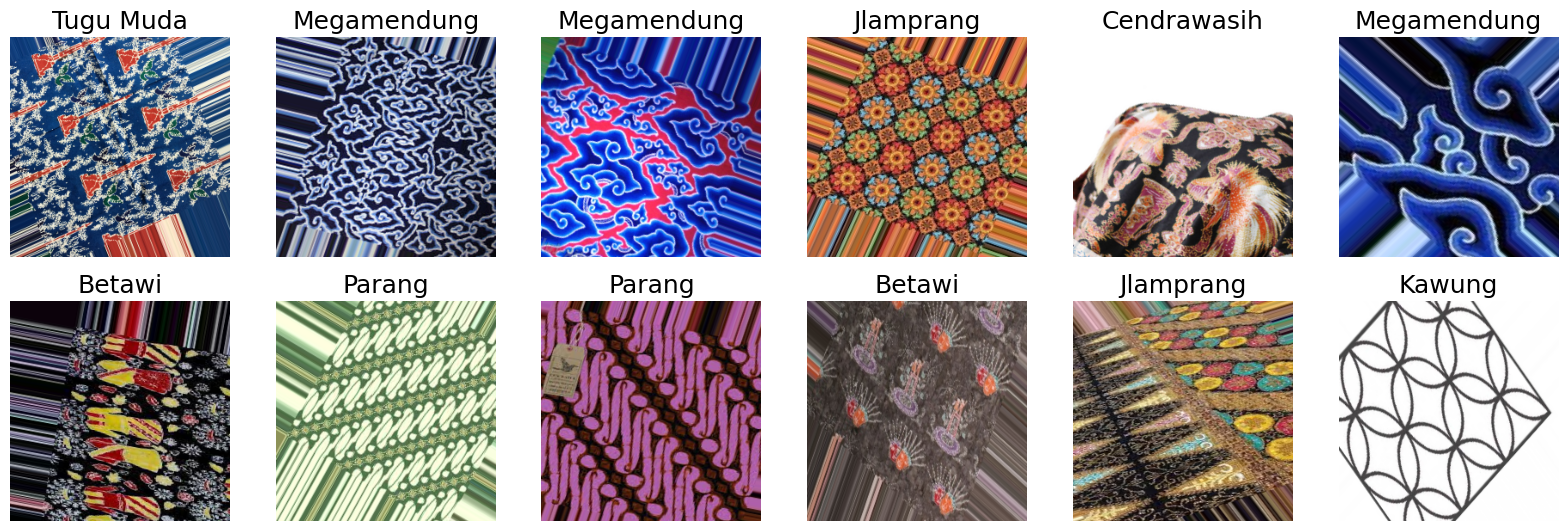

In [ ]:
show_image_samples(train_generator)

# **Create MODEL**

---



In [10]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape = (224, 224, 3),
                                                            include_top = False,
                                                            weights = "imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [11]:
base_model.trainable = False

#Transfer Learning 1


In [12]:
inputs = tf.keras.Input(shape = (224, 224, 3))
x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])



In [13]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Checkpoint
checkpoint_path = 'model_checkpoints/Batik.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weight_only=True,
    verbose=2
)


In [14]:
history = model.fit(train_generator,
            epochs=100,
            verbose = 2,
            validation_data=validation_generator,
            callbacks = [checkpoint])

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.92899, saving model to model_checkpoints/Batik.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 - 511s - loss: 1.2539 - accuracy: 0.6150 - val_loss: 0.9290 - val_accuracy: 0.6646 - 511s/epoch - 6s/step
Epoch 2/100

Epoch 2: val_loss improved from 0.92899 to 0.69848, saving model to model_checkpoints/Batik.h5
88/88 - 38s - loss: 0.7202 - accuracy: 0.7601 - val_loss: 0.6985 - val_accuracy: 0.7866 - 38s/epoch - 437ms/step
Epoch 3/100

Epoch 3: val_loss improved from 0.69848 to 0.60496, saving model to model_checkpoints/Batik.h5
88/88 - 38s - loss: 0.6170 - accuracy: 0.7953 - val_loss: 0.6050 - val_accuracy: 0.8293 - 38s/epoch - 435ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.60496
88/88 - 37s - loss: 0.5727 - accuracy: 0.8159 - val_loss: 0.7062 - val_accuracy: 0.7866 - 37s/epoch - 417ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.60496
88/88 - 39s - loss: 0.5082 - accuracy: 0.8228 - val_loss: 0.6708 - val_accuracy: 0.7927 - 39s/epoch - 438ms/step
Epoch 6/100

Epoch 6: val_loss did not improve from 0.60496
88/88 - 38s - loss: 0.4093 - accuracy: 0

# **Grafik Accuracy & Loss**

---



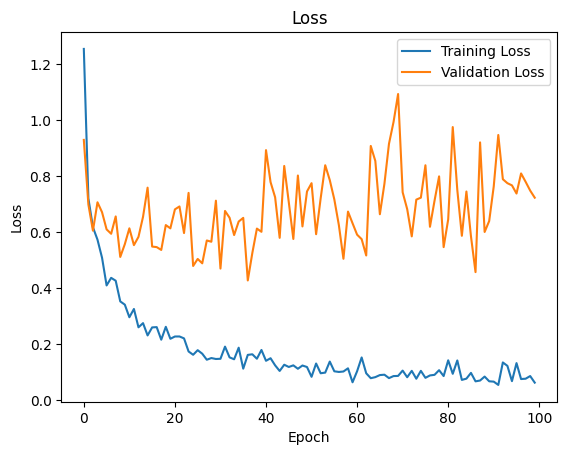

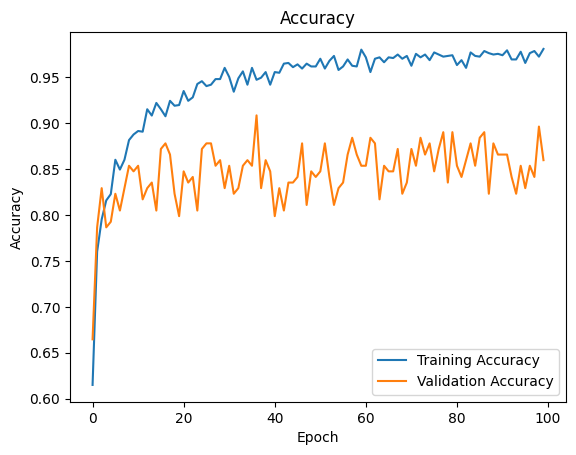

In [15]:
#obtain training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

#accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [16]:
TEST_DIR = TESTING_DIR
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(256, 256))

Found 168 images belonging to 10 classes.


In [17]:
Y_pred_2 = model.predict(test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

11/11 [==============================] - 62s 6s/step


In [18]:
print(classification_report(test_set_2.classes, y_pred_2))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18        17
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         9
           3       0.14      0.11      0.12         9
           4       0.24      0.31      0.27        35
           5       0.40      0.28      0.33        29
           6       0.20      0.22      0.21        36
           7       0.40      0.25      0.31         8
           8       0.12      0.10      0.11        10
           9       0.00      0.00      0.00         8

    accuracy                           0.20       168
   macro avg       0.17      0.14      0.15       168
weighted avg       0.21      0.20      0.20       168



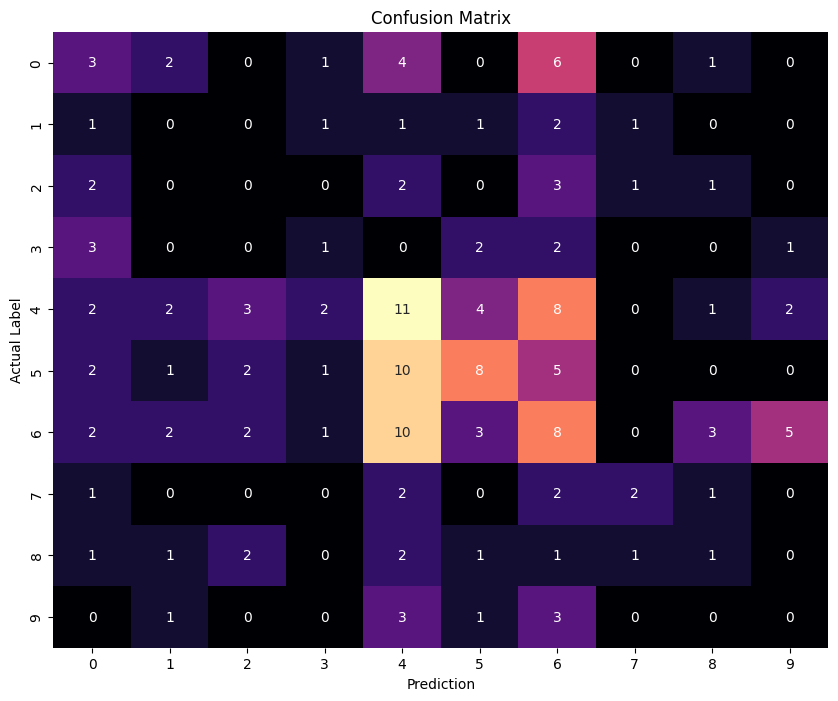

In [19]:
y_true = test_set_2.classes  # actual label
y_pred = y_pred_2  # prediction label

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

# confusion matrix heatmap
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediction')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1.0/225.)
  im_input = tf.reshape(im_array, shape = [1, 224, 224, 3])

  predict_array = model.predict(im_input)[0]

  import pandas as pd
  df = pd.DataFrame(predict_array)
  df = df.rename({0:'Probability'}, axis = 'columns')
  prod = ['Betawi', 'Cendrawasih', 'Dayak', 'Jlamprang', 'Kawung', 'Megamendung', 'Parang', 'Sidoluhur', 'Tambal', 'Tugu Muda']
  df['motif'] = prod
  df = df[['motif', 'Probability']]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
      predict_product = 'Betawi'
  elif predict_label == 1:
      predict_product = 'Cendrawasih'
  elif predict_label == 2:
      predict_product = 'Dayak'
  elif predict_label == 3:
      predict_product = 'Jlamprang'
  elif predict_label == 4:
      predict_product = 'Kawung'
  elif predict_label == 5:
      predict_product = 'Megamendung'
  elif predict_label == 6:
      predict_product = 'Parang'
  elif predict_label == 7:
      predict_product = 'Sidoluhur'
  elif predict_label == 8:
      predict_product = 'Tambal'
  elif predict_label == 9:
      predict_product = 'Tugu Muda'
  return predict_product, df

Saving 48.jpg to 48.jpg
1/1 [==============================] - 0s 20ms/step




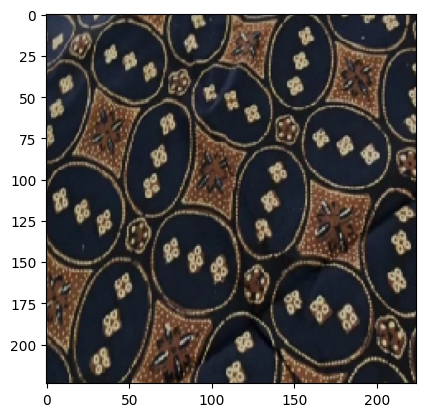


The image is detected as Kawung


         motif   Probability
0       Betawi  9.905621e-14
1  Cendrawasih  2.456331e-17
2        Dayak  3.232985e-12
3    Jlamprang  4.431157e-07
4       Kawung  9.999995e-01
5  Megamendung  1.057156e-10
6       Parang  1.705881e-12
7    Sidoluhur  3.637117e-10
8       Tambal  3.611317e-11
9    Tugu Muda  1.353828e-15




In [27]:
from keras.preprocessing import image
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
  imgplot = plt.imshow(img)
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

label, df = predict_image(img)

print('\n')
plt.show()
print("\nThe image is detected as " + label)
print('\n')
print(df)
print('\n')

In [28]:
#Save model to h5 format

model.save("BatikLens-Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:

from keras.models import model_from_json

#Save model to JSON format
model_json = model.to_json()
with open("ModelBatikLens.json", "w") as json_file:
    json_file.write(model_json)


In [30]:
!sudo pip3 install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [31]:
!sudo tensorflowjs_converter

2024-06-04 10:29:27.619702: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 10:29:29.235528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 963, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 894, in convert
    raise ValueError(
ValueError: Missing input

In [32]:
!tensorflowjs_converter --input_format=keras '/content/BatikLens-Model.h5' "/content/drive/MyDrive/json"

2024-06-04 10:29:39.015163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
